In [1]:
# Import Dependencies
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Connect to SQLite dB
con = sqlite3.connect('/Users/jennadodge/uofo-virt-data-pt-12-2021-u-b/Water_Quality_Analysis/Database/database.sqlite3')

# Create a cursor object
cur = con.cursor()

In [3]:
df = pd.read_sql_query("SELECT * FROM Census_Data INNER JOIN Contaminant_Summary on Census_Data.county_FIPS = Contaminant_Summary.county_FIPS",con)
df.head()

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,8069,"Larimer County, Colorado",Larimer County,0500000US08069,359066,295995,3816,2879,8539,326,...,0.948124,0.375569,0.4428,8069,4,264021,4744,984,1519,1186.00
1,10001,"Kent County, Delaware",Kent County,0500000US10001,181851,107685,46999,1150,4430,126,...,1.305087,0.271086,0.4191,10001,9,70580,4987,201,1395,554.11
2,10003,"New Castle County, Delaware",New Castle County,0500000US10003,570719,314231,146545,2157,35201,176,...,1.464587,0.349206,0.4607,10003,20,555453,15583,68,4732,779.15
3,10005,"Sussex County, Delaware",Sussex County,0500000US10005,237378,175847,25358,1844,3071,113,...,1.161943,0.352475,0.4561,10005,11,205901,5456,91,1295,496.00
4,16019,"Bonneville County, Idaho",Bonneville County,0500000US16019,123964,103736,627,1262,1424,155,...,0.919484,0.401124,0.4287,16019,1,2982,42,42,42,42.00


In [4]:
con.close()

In [5]:
df.shape

(882, 37)

<AxesSubplot:>

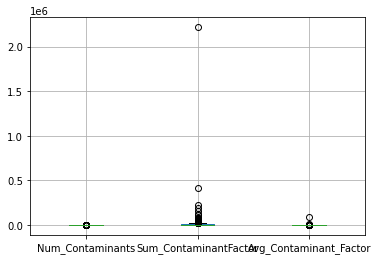

In [6]:
df.boxplot(column=["Num_Contaminants","Sum_ContaminantFactor","Avg_Contaminant_Factor"])

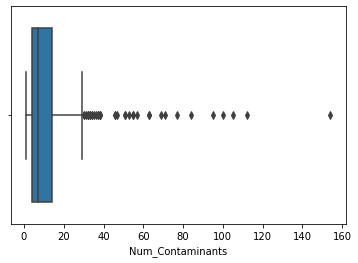

In [7]:
sns.boxplot(x=df['Num_Contaminants'])
plt.show()

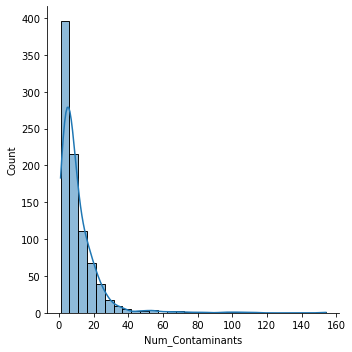

In [8]:
sns.displot(df['Num_Contaminants'],bins=30, kde = True)
plt.show()

In [9]:
df['Num_Contaminants'].describe()

count    882.000000
mean      10.758503
std       12.639396
min        1.000000
25%        4.000000
50%        7.000000
75%       14.000000
max      154.000000
Name: Num_Contaminants, dtype: float64

In [10]:
df['Num_Contaminants'].quantile(0.25)

4.0

In [11]:
df['Num_Contaminants'].quantile(0.75)

14.0

In [12]:
Q1 = df['Num_Contaminants'].quantile(0.25)
Q3 = df['Num_Contaminants'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
IQR

10.0

In [14]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

29.0

In [15]:
# how many data points would remain if we eliminated outliers
outliers_upper = (df['Num_Contaminants'] > upper_lim)
len(df['Num_Contaminants']) - len(df['Num_Contaminants'][outliers_upper])

845

In [16]:
df['Num_Contaminants'][-(outliers_upper)]

0       4
1       9
2      20
3      11
4       1
       ..
872     1
876     6
877     2
878     1
879     1
Name: Num_Contaminants, Length: 845, dtype: int64

In [17]:
df = df[-(outliers_upper)]

In [18]:
df.shape

(845, 37)

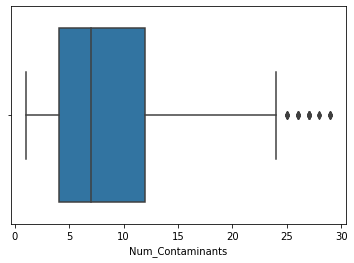

In [19]:
sns.boxplot(x=df['Num_Contaminants'])
plt.show()

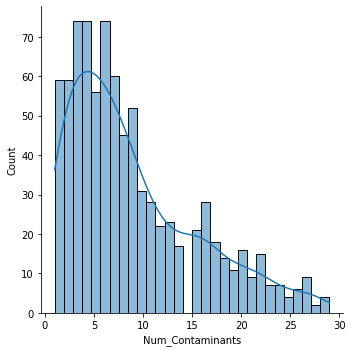

In [20]:
sns.displot(df['Num_Contaminants'],bins=30, kde = True)
plt.show()

### Remove outliers for Sum_ContaminantFactor

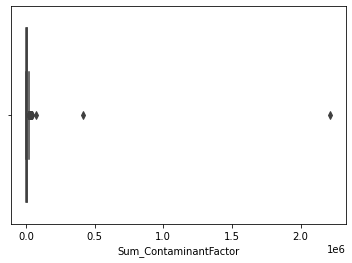

In [21]:
sns.boxplot(x=df['Sum_ContaminantFactor'])
plt.show()

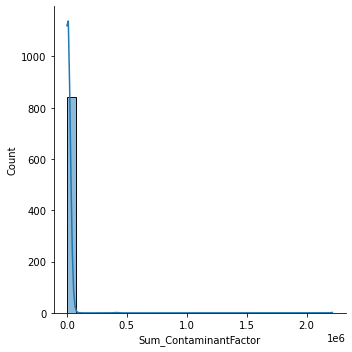

In [22]:
sns.displot(df['Sum_ContaminantFactor'],bins=30, kde = True)
plt.show()

In [23]:
# Same thing for Sum_ContaminantFactor
df['Sum_ContaminantFactor'].describe()

count    8.450000e+02
mean     9.958923e+03
std      7.758093e+04
min      0.000000e+00
25%      1.851000e+03
50%      4.461000e+03
75%      1.001700e+04
max      2.215481e+06
Name: Sum_ContaminantFactor, dtype: float64

In [24]:
Q1 = df['Sum_ContaminantFactor'].quantile(0.25)
Q3 = df['Sum_ContaminantFactor'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
IQR

8166.0

In [26]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

22266.0

In [27]:
# how many data points would remain if we eliminated outliers
outliers_upper = (df['Sum_ContaminantFactor'] > upper_lim)
len(df['Sum_ContaminantFactor']) - len(df['Sum_ContaminantFactor'][outliers_upper])

808

In [28]:
df['Sum_ContaminantFactor'][-(outliers_upper)]

0       4744
1       4987
2      15583
3       5456
4         42
       ...  
872      363
876     7277
877     1188
878     1104
879       20
Name: Sum_ContaminantFactor, Length: 808, dtype: int64

In [29]:
df = df[-(outliers_upper)]

In [30]:
df.describe()

,county_FIPS,Total_Population,White,Black,Native,Asian,Pacific_Islander,Other,Two_or_more_Races,Hispanic,...,pct_Two_or_more_Races,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,808.000000,8.080000e+02,8.080000e+02,8.080000e+02,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02,808.000000,808.000000
mean,34617.904703,9.387610e+04,6.174172e+04,1.051226e+04,940.470297,5950.420792,161.404703,6482.091584,8093.733911,1.370017e+04,...,0.058194,0.266554,0.103957,0.721340,0.198266,0.441240,8.396040,4.673438e+04,5873.143564,768.699369
std,15072.441824,3.033040e+05,1.378511e+05,6.223410e+04,3384.844557,42375.104329,1003.828745,44420.274446,38497.953219,9.367931e+04,...,0.025046,0.156213,0.095936,0.345371,0.137946,0.034327,6.228335,1.506063e+05,5293.297251,583.164846
min,1001.000000,7.060000e+02,4.010000e+02,1.000000e+00,1.000000,1.000000,1.000000,1.000000,20.000000,8.000000e+00,...,0.018930,0.063408,0.011866,0.202798,0.036514,0.315700,1.000000,2.700000e+01,0.000000,0.000000
25%,26026.500000,1.177500e+04,9.715000e+03,6.175000e+01,59.750000,41.000000,3.000000,93.500000,526.000000,2.687500e+02,...,0.040991,0.141233,0.039622,0.445590,0.098888,0.416275,4.000000,4.315250e+03,1778.750000,339.202500
50%,38036.000000,2.786150e+04,2.322500e+04,4.365000e+02,164.000000,133.000000,10.000000,351.500000,1380.500000,9.075000e+02,...,0.052598,0.217509,0.065694,0.633327,0.148381,0.438650,7.000000,1.292450e+04,4097.500000,673.240000
75%,47390.500000,6.953950e+04,5.885200e+04,2.967500e+03,572.000000,751.000000,37.250000,1854.500000,4700.000000,4.387750e+03,...,0.068502,0.358441,0.130779,0.931640,0.254504,0.462925,11.250000,3.707325e+04,8931.500000,1079.700000
max,56045.000000,5.275541e+06,2.345983e+06,1.205825e+06,56895.000000,759031.000000,18915.000000,895152.000000,800156.000000,2.034709e+06,...,0.213875,0.768684,0.498687,1.956877,0.691654,0.550900,29.000000,3.328298e+06,22227.000000,5376.000000


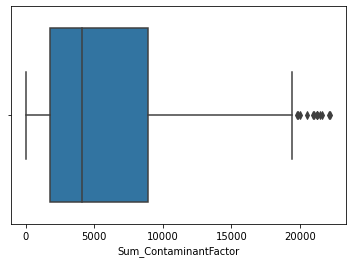

In [31]:
sns.boxplot(x=df['Sum_ContaminantFactor'])
plt.show()

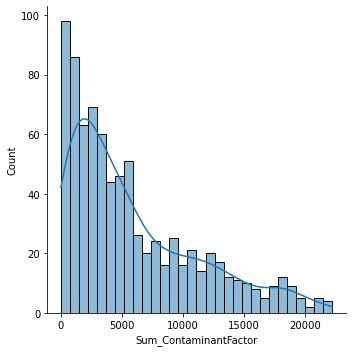

In [32]:
sns.displot(df['Sum_ContaminantFactor'],bins=30, kde = True)
plt.show()

### Remote outliers for Avg Contaminant Factor

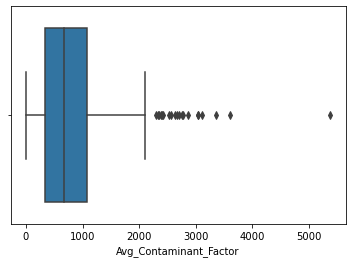

In [33]:
sns.boxplot(x=df['Avg_Contaminant_Factor'])
plt.show()

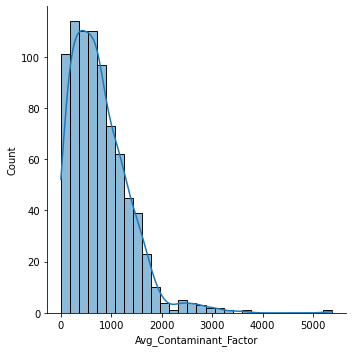

In [34]:
sns.displot(df['Avg_Contaminant_Factor'],bins=30, kde = True)
plt.show()

In [35]:
Q1 = df['Avg_Contaminant_Factor'].quantile(0.25)
Q3 = df['Avg_Contaminant_Factor'].quantile(0.75)
IQR = Q3-Q1
upper_lim = Q3 + 1.5 * IQR
outliers_upper = (df['Avg_Contaminant_Factor'] > upper_lim)
len(df['Avg_Contaminant_Factor']) - len(df['Avg_Contaminant_Factor'][outliers_upper])

788

In [36]:
df = df[-(outliers_upper)]
df.shape

(788, 37)

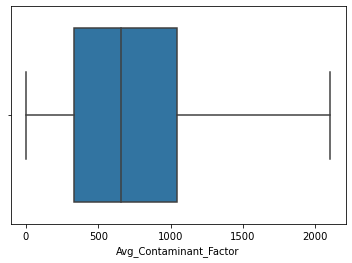

In [37]:
sns.boxplot(x=df['Avg_Contaminant_Factor'])
plt.show()

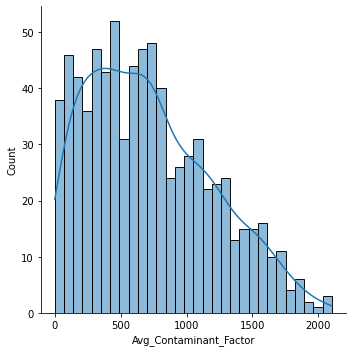

In [38]:
sns.displot(df['Avg_Contaminant_Factor'],bins=30, kde = True)
plt.show()

In [39]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', 'Black', 'Native', 'Asian',
       'Pacific_Islander', 'Other', 'Two_or_more_Races', 'Hispanic',
       'Not_Hispanic', 'Not_White', 'pct_White', 'pct_Black', 'pct_Native',
       'pct_Asian', 'pct_Pacific_Islander', 'pct_Other', 'pct_Not_White',
       'pct_Hispanic', 'pct_Not_Hispanic', 'pct_Two_or_more_Races',
       'Simpson_Race_DI', 'Simpson_Ethnic_DI', 'Shannon_Race_DI',
       'Shannon_Ethnic_DI', 'Gini_Index', 'County_FIPS', 'Num_Contaminants',
       'Sum_Population_Served', 'Sum_ContaminantFactor',
       'Min_Contaminant_Factor', 'Max_Contaminant_Factor',
       'Avg_Contaminant_Factor'],
      dtype='object')

In [40]:
# Export to csv
df.to_csv('data_contaminant_outliers_removed.csv', index = False)